In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU, Input, Concatenate
from tensorflow import keras
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd

In [2]:
TRAIN_SET = '../mit_train_set.pickle'
TEST_SET = '../mit_test_set.pickle'

with open(TEST_SET, 'rb') as file:
    test_set = pickle.load(file)
    x_test = test_set['x']
    y_test = test_set['y']

with open(TRAIN_SET, 'rb') as file:
    train_set = pickle.load(file)
    x_train = train_set['x']
    y_train = train_set['y']
    
x_train_mlp = x_train
x_test_mlp = x_test

x_train = tf.expand_dims(x_train, axis=2)
x_test = tf.expand_dims(x_test, axis=2)

In [3]:
num_classes = 5
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
CNN_model  = keras.models.load_model('CNN_REP')
LSTM_model = keras.models.load_model('LSTM_REP')
MLP_model  = keras.models.load_model('MLP_REP')

In [31]:
CNN = Model(inputs=CNN_model.input, outputs=CNN_model.layers[-10].output)
LSTM = Model(inputs=LSTM_model.input, outputs=LSTM_model.layers[-10].output)
MLP = Model(inputs=MLP_model.input, outputs=MLP_model.layers[-10].output)

In [20]:
MLP.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
dense_15 (Dense)             (None, 187, 5)            10        
_________________________________________________________________
dense_16 (Dense)             (None, 187, 64)           384       
_________________________________________________________________
dense_17 (Dense)             (None, 187, 128)          8320      
_________________________________________________________________
dense_18 (Dense)             (None, 187, 128)          16512     
_________________________________________________________________
dense_19 (Dense)             (None, 187, 128)          16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 187, 128)          0   

In [6]:
CNN.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 185, 5)            20        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 185, 5)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 92, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 89, 10)            210       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 89, 10)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 44, 10)            0     

In [45]:
inputs = Input(shape=x_train.shape[1:])
x = CNN(inputs)
y = Dense(5, activation="softmax")(x)
cnn_model = Model(inputs = inputs, outputs = y)

In [46]:

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
cnn_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [47]:
CNN_history = cnn_model.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7356 - accuracy: 0.7357 - val_loss: 0.3141 - val_accuracy: 0.8931
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2324 - accuracy: 0.9172 - val_loss: 0.2971 - val_accuracy: 0.9035
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1628 - accuracy: 0.9424 - val_loss: 0.2863 - val_accuracy: 0.9152
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1282 - accuracy: 0.9560 - val_loss: 0.3043 - val_accuracy: 0.9166
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1098 - accuracy: 0.9633 - val_loss: 0.3304 - val_accuracy: 0.9175
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0945 - accuracy: 0.9693 - val_loss: 0.3367 - val_accuracy: 0.9154
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0837 - accuracy: 0.9731 - val_loss: 0.3432 - val_ac

In [32]:
inputs = Input(shape=x_train.shape[1:])
x = MLP(inputs)
y = Dense(5, activation="softmax")(x)
mlp_model = Model(inputs = inputs, outputs = y)

In [36]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
mlp_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [37]:
mlp_model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
model_14 (Functional)        (None, 11968)             49994     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 59845     
Total params: 109,839
Trainable params: 109,839
Non-trainable params: 0
_________________________________________________________________


In [38]:
MLP_history = mlp_model.fit(x_train_mlp, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test_mlp, y_test))

Epoch 1/20
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7314 - accuracy: 0.7331 - val_loss: 0.4675 - val_accuracy: 0.8219
Epoch 2/20
1563/1563 [==============================] - 75s 48ms/step - loss: 0.3754 - accuracy: 0.8642 - val_loss: 0.4167 - val_accuracy: 0.8589
Epoch 3/20
1563/1563 [==============================] - 76s 49ms/step - loss: 0.3148 - accuracy: 0.8867 - val_loss: 0.4139 - val_accuracy: 0.8569
Epoch 4/20
1563/1563 [==============================] - 78s 50ms/step - loss: 0.2801 - accuracy: 0.9002 - val_loss: 0.4350 - val_accuracy: 0.8615
Epoch 5/20
1563/1563 [==============================] - 78s 50ms/step - loss: 0.2475 - accuracy: 0.9128 - val_loss: 0.4240 - val_accuracy: 0.8714
Epoch 6/20
1563/1563 [==============================] - 78s 50ms/step - loss: 0.2232 - accuracy: 0.9217 - val_loss: 0.4539 - val_accuracy: 0.8719
Epoch 7/20
1563/1563 [==============================] - 83s 53ms/step - loss: 0.2112 - accuracy: 0.9269 - val_loss: 0.4769 -

In [39]:
inputs = Input(shape=x_train.shape[1:])
x = LSTM(inputs)
y = Dense(5, activation="softmax")(x)
LSTM_model = Model(inputs = inputs, outputs = y)

In [40]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
LSTM_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [41]:
LSTM_history = LSTM_model.fit(x_train_mlp, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test_mlp, y_test))

Epoch 1/20
1563/1563 [==============================] - 97s 61ms/step - loss: 0.9142 - accuracy: 0.6407 - val_loss: 0.4586 - val_accuracy: 0.8287
Epoch 2/20
1563/1563 [==============================] - 104s 66ms/step - loss: 0.4259 - accuracy: 0.8470 - val_loss: 0.4136 - val_accuracy: 0.8534
Epoch 3/20
1563/1563 [==============================] - 103s 66ms/step - loss: 0.3430 - accuracy: 0.8753 - val_loss: 0.3741 - val_accuracy: 0.8658
Epoch 4/20
1563/1563 [==============================] - 104s 67ms/step - loss: 0.3008 - accuracy: 0.8889 - val_loss: 0.3653 - val_accuracy: 0.8764
Epoch 5/20
1563/1563 [==============================] - 104s 66ms/step - loss: 0.2706 - accuracy: 0.9001 - val_loss: 0.3264 - val_accuracy: 0.8902
Epoch 6/20
1563/1563 [==============================] - 107s 69ms/step - loss: 0.2515 - accuracy: 0.9096 - val_loss: 0.3379 - val_accuracy: 0.8894
Epoch 7/20
1563/1563 [==============================] - 107s 68ms/step - loss: 0.2581 - accuracy: 0.9045 - val_loss: 0.

In [57]:
cnn_model.save("CNN_REP_MITBIH")
LSTM_model.save("LSTM_REP_MITBIH")
mlp_model.save("MLP_REP_MITBIH")

INFO:tensorflow:Assets written to: CNN_REP_MITBIH\assets


INFO:tensorflow:Assets written to: CNN_REP_MITBIH\assets


INFO:tensorflow:Assets written to: LSTM_REP_MITBIH\assets


INFO:tensorflow:Assets written to: LSTM_REP_MITBIH\assets


INFO:tensorflow:Assets written to: MLP_REP_MITBIH\assets


INFO:tensorflow:Assets written to: MLP_REP_MITBIH\assets


In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
def plot_history(history):
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()
    
def plot_confusion(model, name):
    predictions = model.predict(x_test)
    print("predictions", )
    matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
    df_cm = pd.DataFrame(matrix, range(5), range(5))
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) 
    labels = ["Normal", "Supraventricular Ectopic", "Ventricular Ectopic", "Fusion", "Unknown"]
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)
    plt.show()



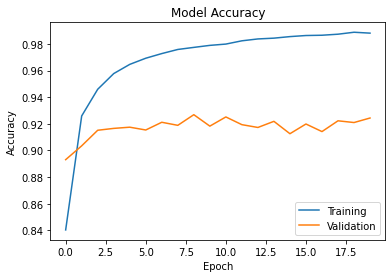

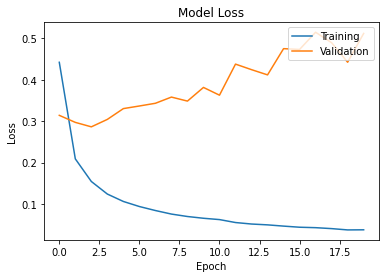

predictions


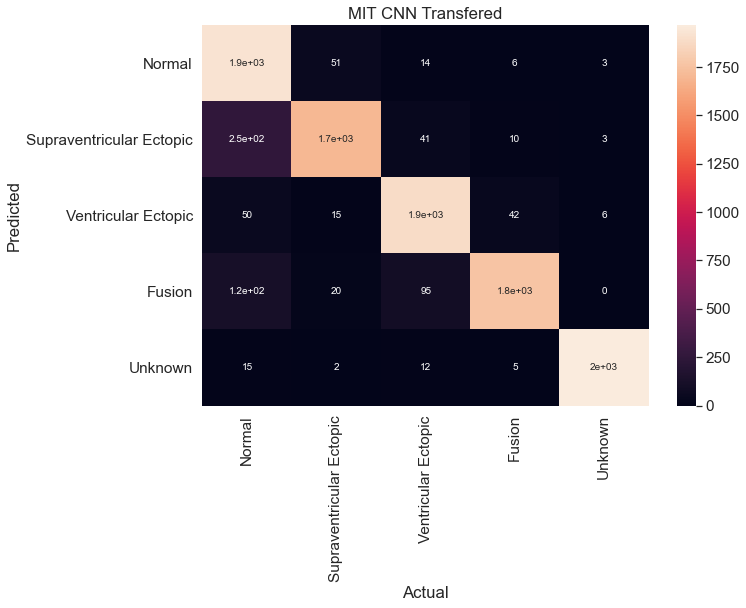

In [51]:
plot_history(CNN_history)
plot_confusion(cnn_model, "MIT CNN Transfered")

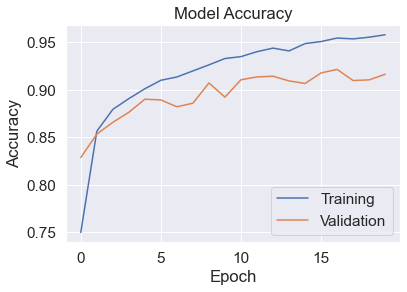

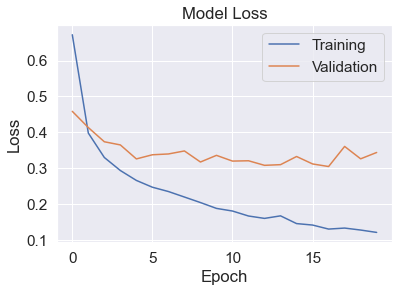

predictions


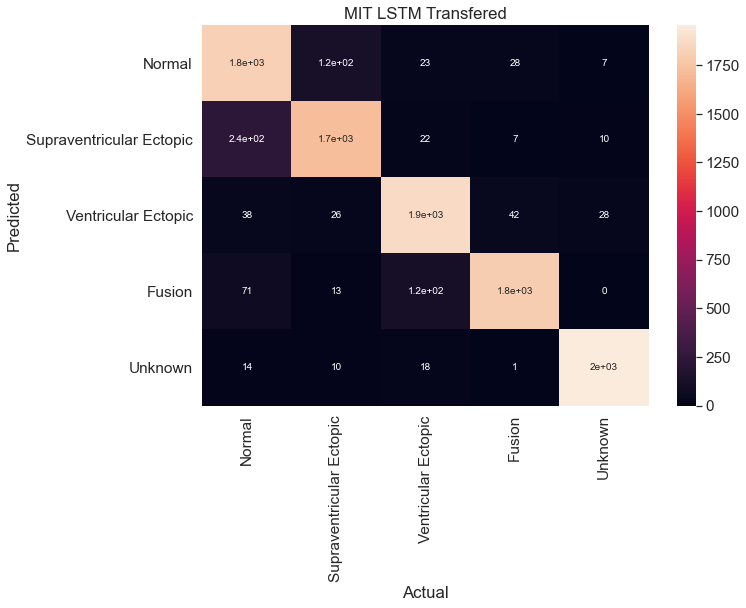

In [52]:
plot_history(LSTM_history)
plot_confusion(LSTM_model, "MIT LSTM Transfered")

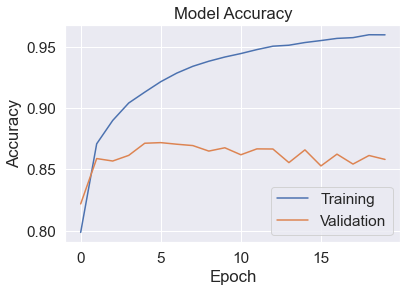

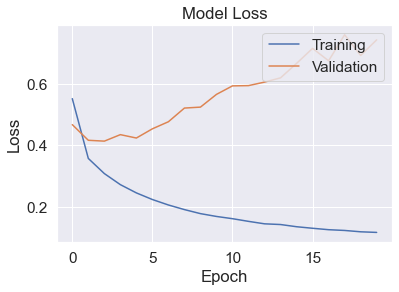

predictions


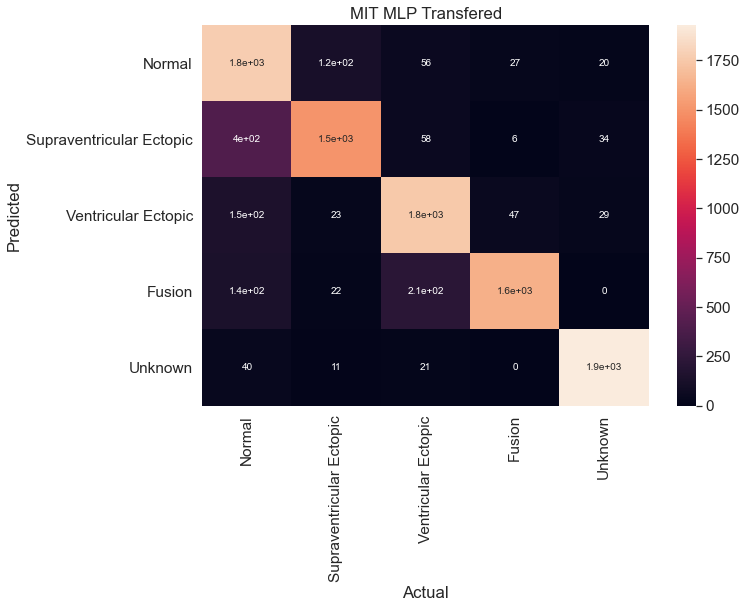

In [56]:
plot_history(MLP_history)
plot_confusion(mlp_model, "MIT MLP Transfered")